In [6]:
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing_utils import *

In [7]:
data_dir = 'cifar-10-batches-py'

# Load cifar-10 dataset.
train_data, train_labels, test_data, test_labels, label_names = load_cifar_10_data(data_dir)

# Shuffle the train_data and divide into train_data and dev_data.
dev_data, dev_labels, train_data, train_labels = split_dataset(train_data, train_labels)

# Check the shape of train/dev/test data and number of classes.
print("Train data: ", train_data.shape)
print("Train labels: ", train_labels.shape)
print("Dev data: ", dev_data.shape)
print("Dev labels: ", dev_labels.shape)
print("Test data: ", test_data.shape)
print("Test labels: ", test_labels.shape)
print('Number of classes:', label_names.shape[0])

Train data:  (40000, 32, 32, 3)
Train labels:  (40000,)
Dev data:  (10000, 32, 32, 3)
Dev labels:  (10000,)
Test data:  (10000, 32, 32, 3)
Test labels:  (10000,)
Number of classes: 10


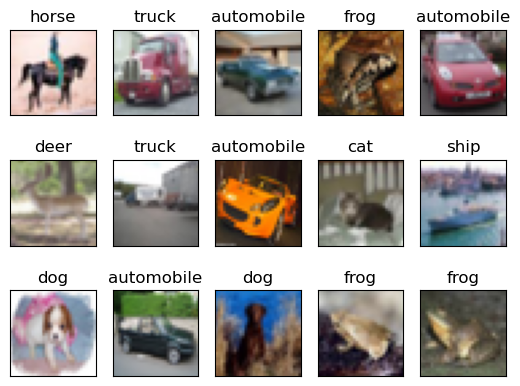

In [8]:
# Don't forget that the label_names and filesnames are in binary and need conversion if used.
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Display some random training images in a 3x5 grid
fig, ax = plt.subplots(3, 5)
for m in range(3):
    for n in range(5):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].set_title(classes[train_labels[idx]]) # display label
        ax[m, n].imshow(train_data[idx]) # display image data
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
plt.show()

In [9]:
# Convert label of each image data into one-hot vector(y). 
# Its length is the same as the number of classes.
y_train = one_hot_encoding(train_labels, classes)
y_dev = one_hot_encoding(dev_labels, classes)
y_test = one_hot_encoding(test_labels, classes)

print(y_train[0])
print(y_train.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(40000, 10)


In [10]:
# Normalize pixel values of input image from [0, 255] range to [0, 1] range.
x_train = normalize_image(train_data)
x_dev = normalize_image(dev_data)
x_test = normalize_image(test_data)

print(train_data[0]) # before normalization
print(x_train[0]) # after normalization

[[[216 229 232]
  [205 219 219]
  [201 216 213]
  ...
  [212 226 225]
  [120 151 137]
  [ 28  70  49]]

 [[210 229 231]
  [168 185 181]
  [121 137 131]
  ...
  [210 226 223]
  [129 153 141]
  [ 51  84  65]]

 [[212 235 229]
  [153 173 161]
  [ 28  42  34]
  ...
  [193 214 209]
  [104 126 115]
  [  5  29  14]]

 ...

 [[125 157  61]
  [142 168  86]
  [141 166  70]
  ...
  [151 174 101]
  [ 97 139  27]
  [ 88 138  32]]

 [[129 163  67]
  [133 161  73]
  [138 164  72]
  ...
  [126 158  70]
  [106 146  47]
  [105 149  49]]

 [[144 174  96]
  [144 170  93]
  [149 172  97]
  ...
  [106 137  50]
  [108 142  51]
  [102 140  43]]]
[[[0.91914894 0.94238683 0.93927126]
  [0.87234043 0.90123457 0.88663968]
  [0.85531915 0.88888889 0.86234818]
  ...
  [0.90212766 0.93004115 0.91093117]
  [0.5106383  0.62139918 0.55465587]
  [0.11914894 0.28806584 0.19838057]]

 [[0.89361702 0.94238683 0.93522267]
  [0.71489362 0.76131687 0.73279352]
  [0.51489362 0.56378601 0.53036437]
  ...
  [0.89361702 0.9300411